La carpeta ya existe: c:\Users\sirce\OneDrive - Universidad de los andes\MIIA\Modelaje y mejora de procesos\Simulacion\Proyecto\distributions
La carpeta ya existe: c:\Users\sirce\OneDrive - Universidad de los andes\MIIA\Modelaje y mejora de procesos\Simulacion\Proyecto\historic_data
La carpeta ya existe: c:\Users\sirce\OneDrive - Universidad de los andes\MIIA\Modelaje y mejora de procesos\Simulacion\Proyecto\plots
La carpeta ya existe: c:\Users\sirce\OneDrive - Universidad de los andes\MIIA\Modelaje y mejora de procesos\Simulacion\Proyecto\salidas


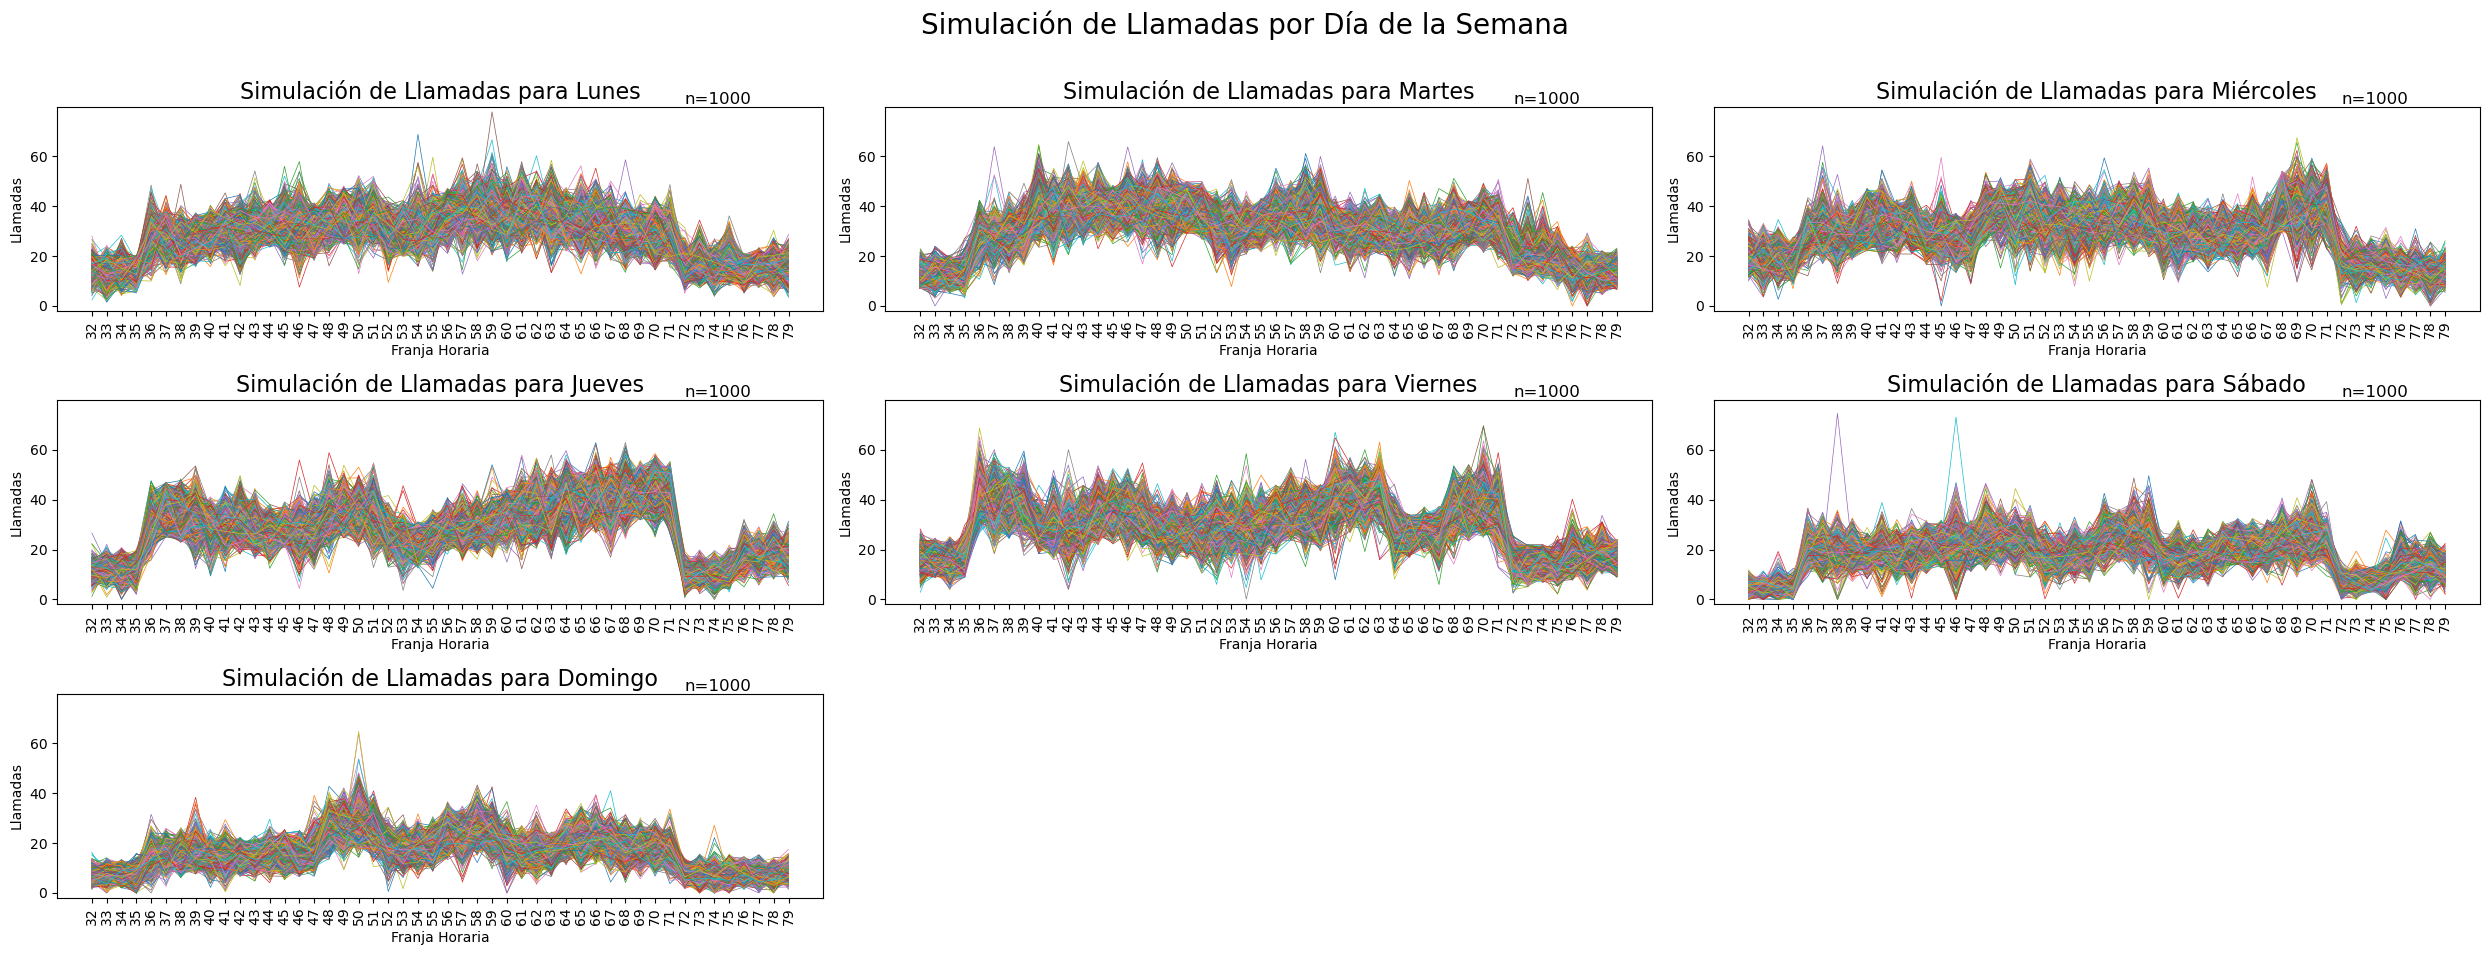

Simulación....1
Simulación....2
Simulación....3
Simulación....4
Simulación....5
Simulación....6
Simulación....7
Simulación....8
Simulación....9
Simulación....10
Simulación....11
Simulación....12
Simulación....13
Simulación....14
Simulación....15
Simulación....16
Simulación....17
Simulación....18
Simulación....19
Simulación....20
Simulación....21
Simulación....22
Simulación....23
Simulación....24
Simulación....25
Simulación....26
Simulación....27
Simulación....28
Simulación....29
Simulación....30
Simulación....31
Simulación....32
Simulación....33
Simulación....34
Simulación....35
Simulación....36
Simulación....37
Simulación....38
Simulación....39
Simulación....40
Simulación....41
Simulación....42
Simulación....43
Simulación....44
Simulación....45
Simulación....46
Simulación....47
Simulación....48
Simulación....49
Simulación....50
Simulación....51
Simulación....52
Simulación....53
Simulación....54
Simulación....55
Simulación....56
Simulación....57
Simulación....58
Simulación....59
Simula

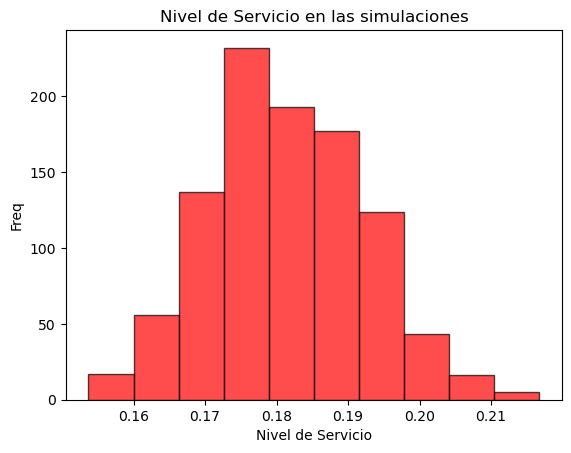

-------------------------------------
Tasa de abandono
Número de simulaciones =1000
Media = 0.012784593710236221
Desviación estandar = 0.012784593710236221
Intervalo de confianza al 80% = [0.598588080641221,0.6312300376260076]


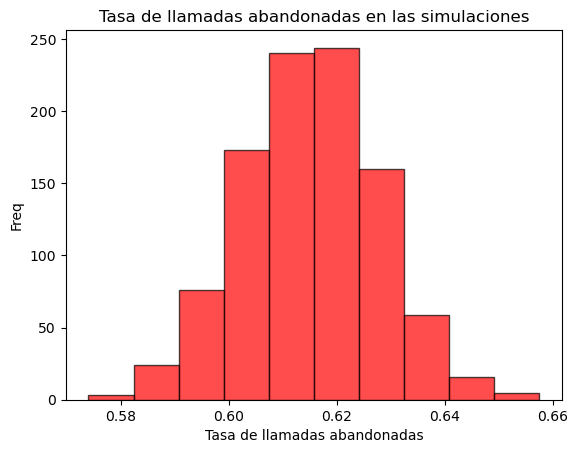

-------------------------------------
Tiempo de espera
Número de simulaciones =1000
Media = 1.5818707144013182
Desviación estandar = 1.5818707144013182
Intervalo de confianza al 80% = [35.3654148918831,39.54913893821565]


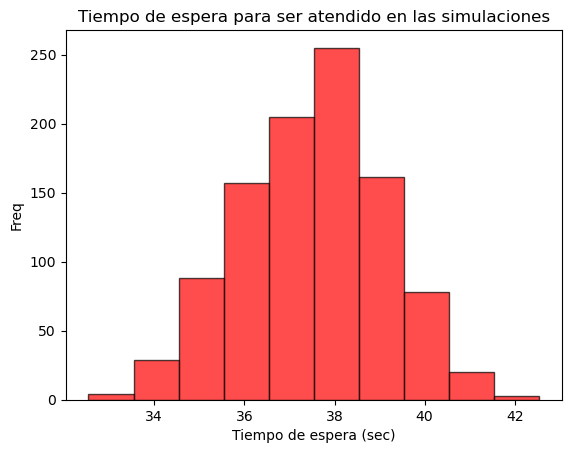

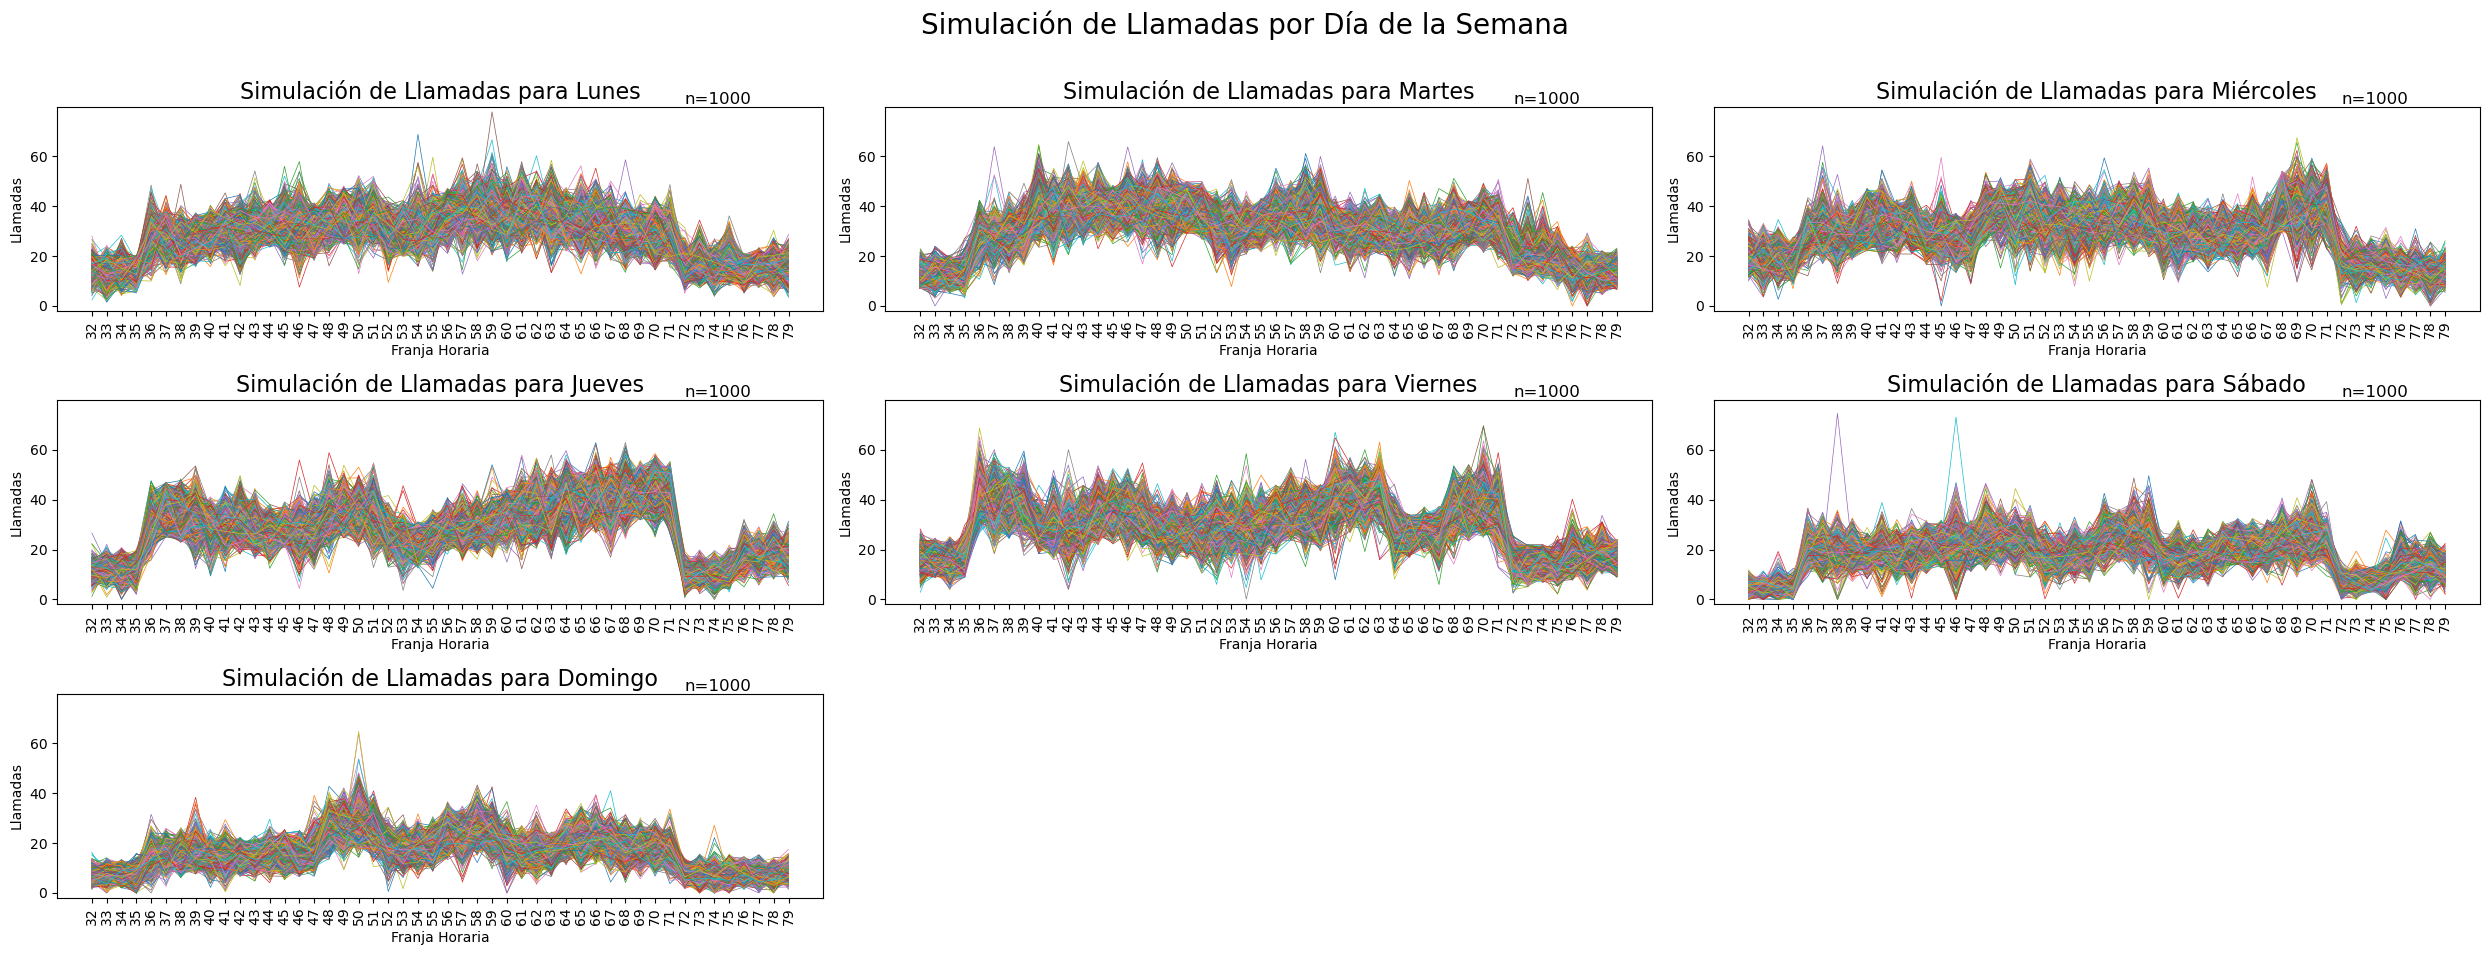

---------------------------------
Forecast


,Dia,Franja,Media,Percentil 10,Percentil 90
0,Lunes,32,13,9,18
1,Lunes,33,13,8,18
2,Lunes,34,14,9,19
3,Lunes,35,13,8,18
4,Lunes,36,26,19,34
...,...,...,...,...,...
331,Domingo,75,7,3,11
332,Domingo,76,8,4,12
333,Domingo,77,7,4,11
334,Domingo,78,7,3,10


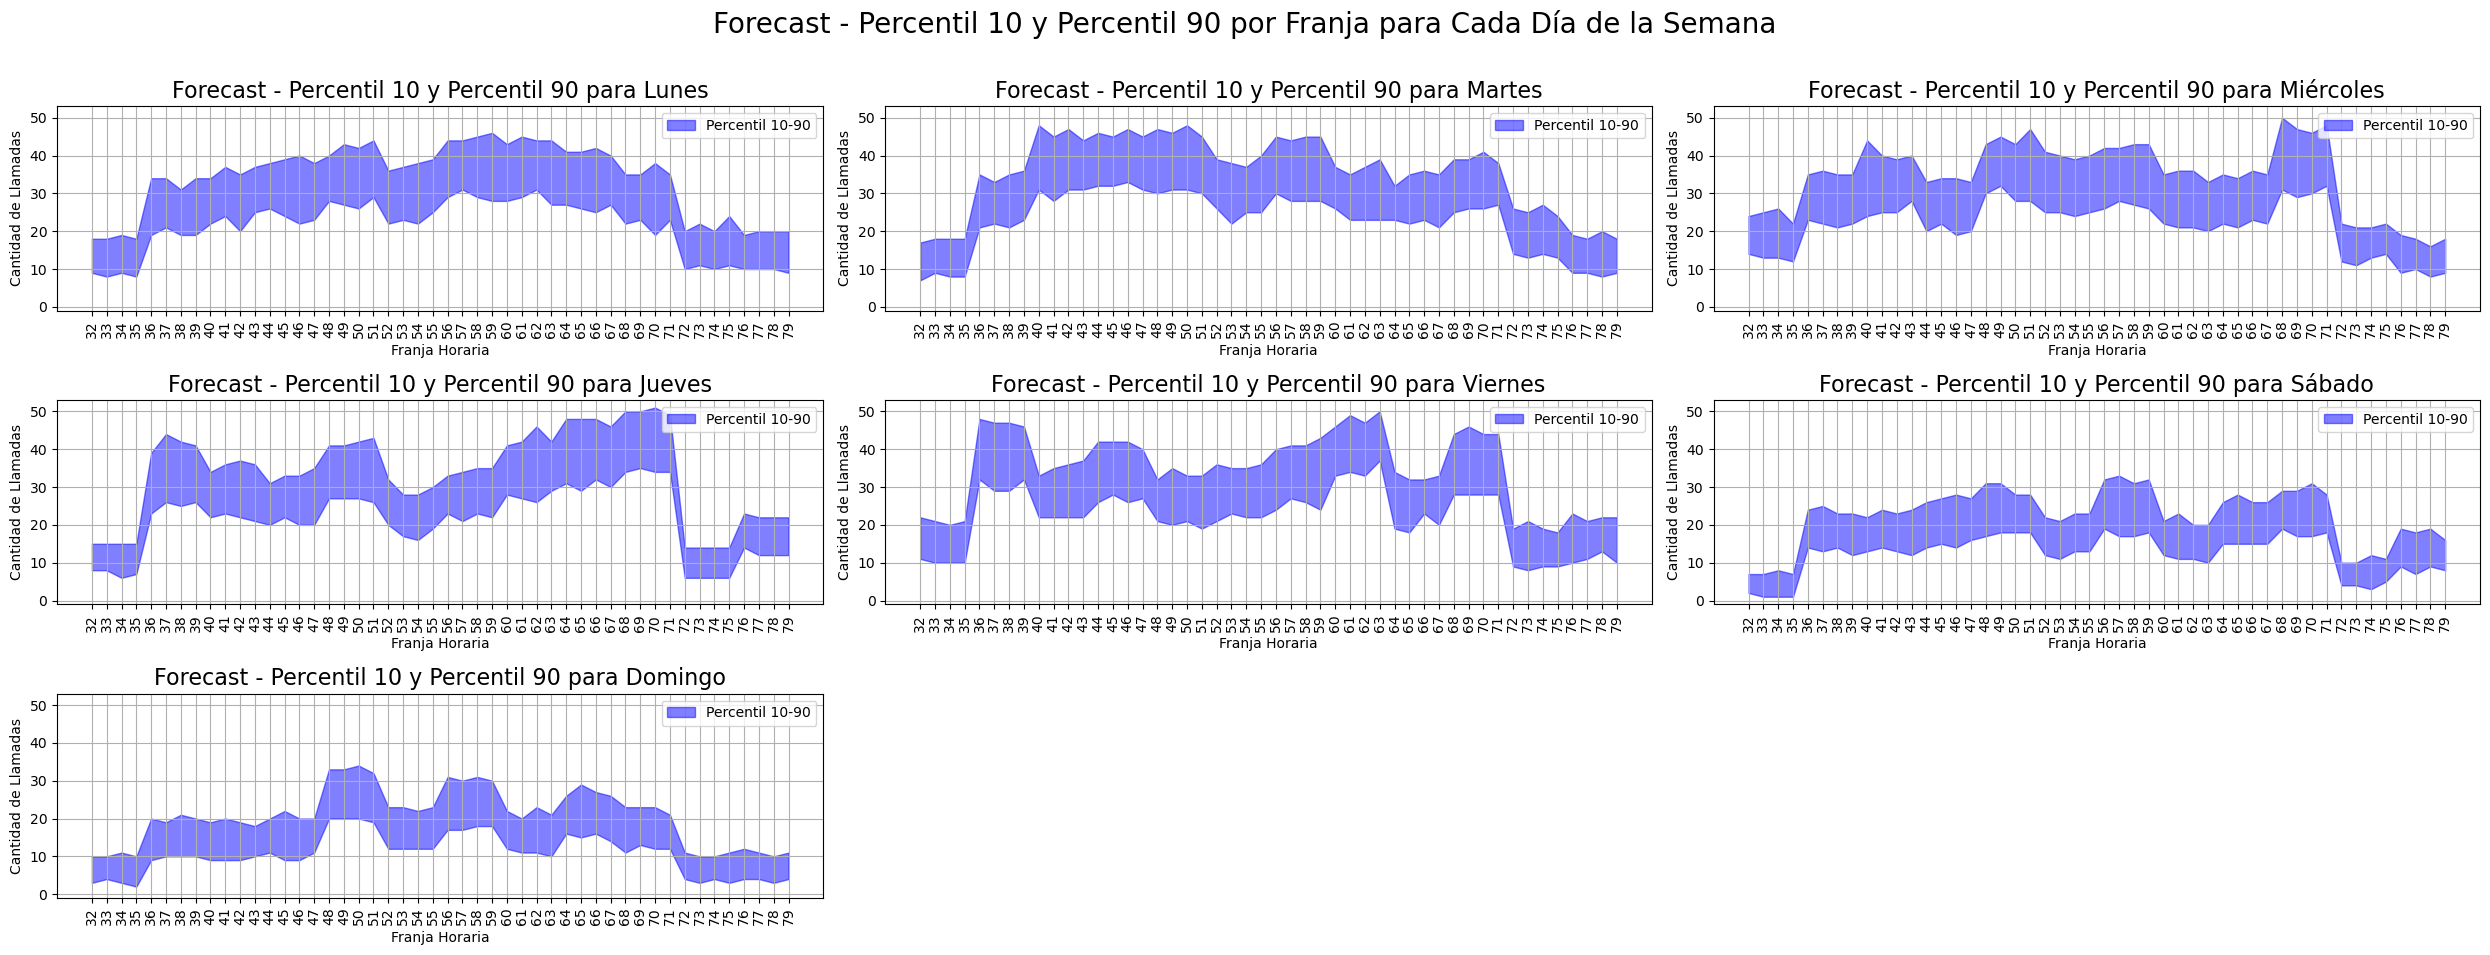

In [1]:
from utils import CallsGenerator, CallsSimulator, TimeDeal, CallCenterSimulator
import os 
import json 

#Crear carpetas si no existen
CallsGenerator.create_directory()
generator = CallsGenerator("08:00", "20:00", seed=42)

#Cargar la data historica si está disponible, si no generarla 
if 'Syn_Calls.csv' not in os.listdir('historic_data'):    
    calls_df = generator.generate_calls_for_year()
    calls_df.to_csv('historic_data/Syn_Calls.csv', index=False)

CallsSimulator.initialize_demands('historic_data/Syn_Calls.csv')

simulator = CallsSimulator(seed=42)
simulator.get_daily_demand()

#Cargar la distribucion de AHT está disponible, si no generarla 
if 'AHT_prob_dist.json' not in os.listdir('distributions'):
    simulator.get_aht_distributions()
    with open("distributions/AHT_prob_dist.json", "w") as file:
        json.dump(simulator.AHT_probability_distributions, file)
else:
    with open("distributions/AHT_prob_dist.json", 'r') as archivo:
        AHT_prob_dist = json.load(archivo)
    simulator.get_aht_distributions(AHT_prob_dist)


#Cargar la distribucion de llamadas si está disponible, si no generarla 
if 'calls_probability_dist.json' not in os.listdir('distributions'):
    simulator.get_calls_distributions()
    with open("distributions/calls_probability_dist.json", "w") as file:
        json.dump(simulator.calls_probability_distributions, file)
else:
    with open("distributions/calls_probability_dist.json", 'r') as archivo:
        calls_prob_dist = json.load(archivo)
    simulator.get_calls_distributions(calls_prob_dist)



simulator.get_abandoned_dist(80,30)

simulator.simulate_calls()
simulator.plot_simulated_calls()


##Definimos el dia de la semana a simular
day_of_week = '0' 

# Entrada de disponibilidad de agentes 
agents_per_timestamp ={
        '32': 1,
        '33': 1,
        '34': 1,
        '35': 1,
        '36': 1,
        '37': 1,
        '38': 2,
        '39': 2,
        '40': 4,
        '41': 4,
        '42': 3,
        '43': 3,
        '44': 4,
        '45': 4,
        '46': 5,
        '47': 5,
        '48': 5,
        '49': 5,
        '50': 5,
        '51': 5,
        '52': 5,
        '53': 5,
        '54': 5,
        '55': 5,
        '56': 5,
        '57': 2,
        '58': 2,
        '59': 2,
        '60': 2,
        '61': 3,
        '62': 3,
        '63': 3,
        '64': 4,
        '65': 5,
        '66': 5,
        '67': 4,
        '68': 5,
        '69': 5,
        '70': 5,
        '71': 5,
        '72': 4,
        '73': 3,
        '74': 2,
        '75': 3,
        '76': 3,
        '77': 3,
        '78': 2,
        '79':2
    }


callCenterSim = CallCenterSimulator(simulator, agents_per_timestamp, day_of_week, n_simulaciones=1000)
callCenterSim.simulate()
simulator.plot_simulated_calls()
simulator.get_forecast()